In [1]:
import pandas as pd
import datetime as dt
import numpy as np
incident = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/incidents.csv',
                       parse_dates = ['CallConfirmedDT'],dtype='unicode')
unit = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/units.csv',dtype='unicode')
patient = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/patients.csv',
                      parse_dates =['UnitTransportedDT','UnitTransportedArrivalDT'],dtype='unicode')
history = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/UnitHistory.txt',sep="|",dtype='unicode')
outservice = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/OutOfService.txt',
                         parse_dates=['OOSOutOfServiceDT', 'OOSInServiceDT'],sep=",",dtype='unicode')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
patient

PrimaryKey PatientID TransportUnitID   UnitTransportedDT  \
0       09804015371    640838            M401 2018-07-01 02:47:55   
1       09804016046    641032            M401 2018-07-01 11:44:54   
2       09804018610    641839            M401 2018-07-02 09:54:49   
3       09804018946    641959            M401 2018-07-02 11:41:42   
4       09804019337    642086            M401 2018-07-02 14:21:28   
...             ...       ...             ...                 ...   
125142     12358275   1436704            M437 2020-12-31 16:37:53   
125143     12358430   1436857           M409B 2020-12-31 18:47:49   
125144     12358869   1436997            M414 2020-12-31 22:17:33   
125145     12358900   1436996            M418 2020-12-31 22:26:13   
125146     12359015   1437053            M431 2020-12-31 23:45:03   

       UnitTransportedArrivalDT                    TransportLOC  \
0           2018-07-01 03:06:39  Level 3: 1 Provider (ALS Care)   
1           2018-07-01 11:55:05  Level 4: 1 Provider (BLS Care)   
2           2018-07-02 10:08:54  Level 4: 1 Provider (BLS Care)   
3           2018-07-02 12:08:36  Level 4: 1 Provider (BLS Care)   
4           2018-07-02 14:33:41  Level 3: 1 Provider (ALS Care)   
...                         ...                             ...   
125142      2020-12-31 16:47:10  Level 4: 1 Provider (BLS Care)   
125143      2020-12-31 18:55:24  Level 3: 1 Provider (ALS Care)   
125144      2020-12-31 22:31:28  Level 3: 1 Provider (ALS Care)   
125145      2020-12-31 22:32:30  Level 4: 1 Provider (BLS Care)   
125146      2020-12-31 23:56:22  Level 3: 1 Provider (ALS Care)   

       TransportHospitalCode                  TransportHospitalName  \
0                          3               Virginia Hospital Center   
1                          3               Virginia Hospital Center   
2                         16                       Fairfax Hospital   
3                          3               Virginia Hospital Center   
4                          3               Virginia Hospital Center   
...                      ...                                    ...   
125142                    47                  Mount Vernon Hospital   
125143                    47                  Mount Vernon Hospital   
125144                    16                       Fairfax Hospital   
125145                   202  Inova Emergency Care Center - Fairfax   
125146                    95                 Reston Hospital Center   

                                          ReasonForChoosingHospital  \
0                                 Patient's Choice,Closest Facility   
1                                                  Patient's Choice   
2                                                  Closest Facility   
3       Closest Facility,Family Choice,Patient's Physician's Choice   
4                     Closest Facility,Patient's Physician's Choice   
...                                                             ...   
125142                                             Closest Facility   
125143                                             Closest Facility   
125144                                             Closest Facility   
125145                                             Closest Facility   
125146                                             Closest Facility   

       PatientAge  \
0         80 - 89   
1         80 - 89   
2         40 - 49   
3         80 - 89   
4         20 - 29   
...           ...   
125142    60 - 69   
125143    30 - 39   
125144    60 - 69   
125145    20 - 29   
125146    10 - 19   

                                                      PrimaryImpression  \
0                                GI/GU - Nausea (With Vomiting) (R11.2)   
1                              EENT - Eye Pain (Non-traumatic) (H57.10)   
2                                                Injury - Foot (S99.92)   
3                                                 Injury - Hip (S79.91)   
4       Neuro - Altered Mental Status / L

# find 1 patient

In [3]:
number1=patient.groupby(['PrimaryKey'])['PatientID'].count().to_frame('Count # of PatientID').reset_index()
number1

PrimaryKey  Count # of PatientID
0       09804015371                     1
1       09804016046                     1
2       09804018610                     1
3       09804018946                     1
4       09804019337                     1
...             ...                   ...
122642     12358275                     1
122643     12358430                     1
122644     12358869                     1
122645     12358900                     1
122646     12359015                     1

[122647 rows x 2 columns]

In [4]:
only1_patient=number1[number1['Count # of PatientID']==1]
only1_patient

PrimaryKey  Count # of PatientID
0       09804015371                     1
1       09804016046                     1
2       09804018610                     1
3       09804018946                     1
4       09804019337                     1
...             ...                   ...
122642     12358275                     1
122643     12358430                     1
122644     12358869                     1
122645     12358900                     1
122646     12359015                     1

[120627 rows x 2 columns]

In [5]:
new_patient1=patient.merge(only1_patient,on='PrimaryKey')
new_patient1

PrimaryKey PatientID TransportUnitID   UnitTransportedDT  \
0       09804015371    640838            M401 2018-07-01 02:47:55   
1       09804016046    641032            M401 2018-07-01 11:44:54   
2       09804018610    641839            M401 2018-07-02 09:54:49   
3       09804018946    641959            M401 2018-07-02 11:41:42   
4       09804019337    642086            M401 2018-07-02 14:21:28   
...             ...       ...             ...                 ...   
120622     12358275   1436704            M437 2020-12-31 16:37:53   
120623     12358430   1436857           M409B 2020-12-31 18:47:49   
120624     12358869   1436997            M414 2020-12-31 22:17:33   
120625     12358900   1436996            M418 2020-12-31 22:26:13   
120626     12359015   1437053            M431 2020-12-31 23:45:03   

       UnitTransportedArrivalDT                    TransportLOC  \
0           2018-07-01 03:06:39  Level 3: 1 Provider (ALS Care)   
1           2018-07-01 11:55:05  Level 4: 1 Provider (BLS Care)   
2           2018-07-02 10:08:54  Level 4: 1 Provider (BLS Care)   
3           2018-07-02 12:08:36  Level 4: 1 Provider (BLS Care)   
4           2018-07-02 14:33:41  Level 3: 1 Provider (ALS Care)   
...                         ...                             ...   
120622      2020-12-31 16:47:10  Level 4: 1 Provider (BLS Care)   
120623      2020-12-31 18:55:24  Level 3: 1 Provider (ALS Care)   
120624      2020-12-31 22:31:28  Level 3: 1 Provider (ALS Care)   
120625      2020-12-31 22:32:30  Level 4: 1 Provider (BLS Care)   
120626      2020-12-31 23:56:22  Level 3: 1 Provider (ALS Care)   

       TransportHospitalCode                  TransportHospitalName  \
0                          3               Virginia Hospital Center   
1                          3               Virginia Hospital Center   
2                         16                       Fairfax Hospital   
3                          3               Virginia Hospital Center   
4                          3               Virginia Hospital Center   
...                      ...                                    ...   
120622                    47                  Mount Vernon Hospital   
120623                    47                  Mount Vernon Hospital   
120624                    16                       Fairfax Hospital   
120625                   202  Inova Emergency Care Center - Fairfax   
120626                    95                 Reston Hospital Center   

                                          ReasonForChoosingHospital  \
0                                 Patient's Choice,Closest Facility   
1                                                  Patient's Choice   
2                                                  Closest Facility   
3       Closest Facility,Family Choice,Patient's Physician's Choice   
4                     Closest Facility,Patient's Physician's Choice   
...                                                             ...   
120622                                             Closest Facility   
120623                                             Closest Facility   
120624                                             Closest Facility   
120625                                             Closest Facility   
120626                                             Closest Facility   

       PatientAge  \
0         80 - 89   
1         80 - 89   
2         40 - 49   
3         80 - 89   
4         20 - 29   
...           ...   
120622    60 - 69   
120623    30 - 39   
120624    60 - 69   
120625    20 - 29   
120626    10 - 19   

                                                      PrimaryImpression  \
0                                GI/GU - Nausea (With Vomiting) (R11.2)   
1                              EENT - Eye Pain (Non-traumatic) (H57.10)   
2                                                Injury - Foot (S99.92)   
3                                                 Injury - Hip (S79.91)   
4       Neuro - Altered Mental Status / L

# Detect Second Provider again

# Case1

In [6]:
#Check TransportLOC
level1=new_patient1[new_patient1['TransportLOC']=='Level 1: 3 or More Providers (ALS Care)']
level1
# It has 3571 cases.

PrimaryKey PatientID TransportUnitID   UnitTransportedDT  \
14      09804048961    642269            M404 2018-07-02 12:03:24   
116     09804217052    641383            M421 2018-07-01 20:22:52   
164     09804268984    642523            M423 2018-07-02 11:55:46   
183     09804297520    641524            M429 2018-07-01 23:35:18   
312     09814088788    644981            M418 2018-07-05 15:08:13   
...             ...       ...             ...                 ...   
120442  12354253241   1435145            M425 2020-12-29 15:14:11   
120458  12354265113   1435684           M408B 2020-12-30 11:07:05   
120498  12354292710   1435042            M413 2020-12-29 11:50:35   
120510  12354297780   1436595            M429 2020-12-31 13:22:00   
120609  12354444851   1435559            M401 2020-12-30 08:53:12   

       UnitTransportedArrivalDT                             TransportLOC  \
14          2018-07-02 12:13:13  Level 1: 3 or More Providers (ALS Care)   
116         2018-07-01 20:30:52  Level 1: 3 or More Providers (ALS Care)   
164         2018-07-02 12:04:47  Level 1: 3 or More Providers (ALS Care)   
183         2018-07-01 23:44:45  Level 1: 3 or More Providers (ALS Care)   
312         2018-07-05 15:29:25  Level 1: 3 or More Providers (ALS Care)   
...                         ...                                      ...   
120442      2020-12-29 15:20:06  Level 1: 3 or More Providers (ALS Care)   
120458      2020-12-30 11:14:29  Level 1: 3 or More Providers (ALS Care)   
120498      2020-12-29 12:08:16  Level 1: 3 or More Providers (ALS Care)   
120510      2020-12-31 13:33:27  Level 1: 3 or More Providers (ALS Care)   
120609      2020-12-30 09:02:01  Level 1: 3 or More Providers (ALS Care)   

       TransportHospitalCode     TransportHospitalName  \
14                        95    Reston Hospital Center   
116                       11        Fair Oaks Hospital   
164                       16          Fairfax Hospital   
183                       16          Fairfax Hospital   
312                       16          Fairfax Hospital   
...                      ...                       ...   
120442                    95    Reston Hospital Center   
120458                    16          Fairfax Hospital   
120498                     3  Virginia Hospital Center   
120510                    16          Fairfax Hospital   
120609                    16          Fairfax Hospital   

                                        ReasonForChoosingHospital PatientAge  \
14                                               Closest Facility    60 - 69   
116                                              Closest Facility    30 - 39   
164                                              Closest Facility    80 - 89   
183     Closest Facility,Specialty Center (Trauma, STEMI, Stroke)    80 - 89   
312                                                 Family Choice    70 - 79   
...                                                           ...        ...   
120442                                           Closest Facility    70 - 79   
120458                                           Closest Facility    40 - 49   
120498              Patient's Choice,Patient's Physician's Choice    80 - 89   
120510                                           Closest Facility    70 - 79   
120609                                           Closest Facility    60 - 69   

                                                                 PrimaryImpression  \
14                                                        CV - Hypotension (I95.9)   
116                                                   Neuro - Unconscious (R40.20)   
164                       Respiratory - Acute Distress/ Breathing Difficulty (J80)   
183                                                     Neuro - Stroke/CVA (I63.9)   
312                Neuro - Altered Mental Status / Level of Consciousness (R41.82)   
...                                                                            ...   
120442 

In [7]:
#Prepare data for check out of service
new_incident=incident[['PrimaryKey','CallConfirmedDT']]
new_incident

PrimaryKey     CallConfirmedDT
0       09804095125 2018-07-01 00:05:40
1       09804225142 2018-07-01 00:09:19
2       09804225144 2018-07-01 00:09:24
3       09804105181 2018-07-01 00:25:54
4       09804085219 2018-07-01 00:47:45
...             ...                 ...
122741  12354409006 2020-12-31 23:05:51
122742     12359015 2020-12-31 23:11:47
122743  12354219030 2020-12-31 23:20:03
122744  12354449085 2020-12-31 23:45:44
122745  12354229090 2020-12-31 23:47:48

[122746 rows x 2 columns]

In [8]:
new_unit=unit[['PrimaryKey','ResponseUnitID']]
new_unit

PrimaryKey ResponseUnitID
0       09804015371           E401
1       09804015371           M401
2       09804016046           M401
3       09804018610           E401
4       09804018610           M401
...             ...            ...
280151     12358869           M414
280152     12358900           E418
280153     12358900           M418
280154     12359015           E431
280155     12359015           M431

[280156 rows x 2 columns]

# Sherya Tasks

In [9]:
level1_join_unit=level1.merge(new_unit,on='PrimaryKey')
check=level1_join_unit.groupby(['PrimaryKey'])['ResponseUnitID'].count().to_frame('Count # of res unit').reset_index()
cc=check[check['Count # of res unit']<3]
cc.drop_duplicates(['PrimaryKey'])
cc

PrimaryKey  Count # of res unit
0     09804048961                    2
1     09804217052                    2
2     09804268984                    2
3     09804297520                    2
5     09814099742                    2
...           ...                  ...
3562  12354134670                    2
3563  12354154066                    2
3564  12354155819                    2
3568  12354292710                    2
3570  12354444851                    2

[2035 rows x 2 columns]

In [10]:
cc1=cc.merge(number1,on='PrimaryKey')
cc1[cc1['Count # of PatientID']==1]

PrimaryKey  Count # of res unit  Count # of PatientID
0     09804048961                    2                     1
1     09804217052                    2                     1
2     09804268984                    2                     1
3     09804297520                    2                     1
4     09814099742                    2                     1
...           ...                  ...                   ...
2030  12354134670                    2                     1
2031  12354154066                    2                     1
2032  12354155819                    2                     1
2033  12354292710                    2                     1
2034  12354444851                    2                     1

[2035 rows x 3 columns]

In [11]:
new_df=new_unit.merge(new_incident,how='left',on='PrimaryKey')
new_df

PrimaryKey ResponseUnitID     CallConfirmedDT
0       09804015371           E401 2018-07-01 02:16:24
1       09804015371           M401 2018-07-01 02:16:24
2       09804016046           M401 2018-07-01 11:20:51
3       09804018610           E401 2018-07-02 09:31:06
4       09804018610           M401 2018-07-02 09:31:06
...             ...            ...                 ...
280174     12358869           M414 2020-12-31 21:50:49
280175     12358900           E418 2020-12-31 22:05:52
280176     12358900           M418 2020-12-31 22:05:52
280177     12359015           E431 2020-12-31 23:11:47
280178     12359015           M431 2020-12-31 23:11:47

[280179 rows x 3 columns]

In [12]:
new_level1=level1[['PrimaryKey','TransportUnitID','UnitTransportedDT','Count # of PatientID']]
new_level1

PrimaryKey TransportUnitID   UnitTransportedDT  Count # of PatientID
14      09804048961            M404 2018-07-02 12:03:24                     1
116     09804217052            M421 2018-07-01 20:22:52                     1
164     09804268984            M423 2018-07-02 11:55:46                     1
183     09804297520            M429 2018-07-01 23:35:18                     1
312     09814088788            M418 2018-07-05 15:08:13                     1
...             ...             ...                 ...                   ...
120442  12354253241            M425 2020-12-29 15:14:11                     1
120458  12354265113           M408B 2020-12-30 11:07:05                     1
120498  12354292710            M413 2020-12-29 11:50:35                     1
120510  12354297780            M429 2020-12-31 13:22:00                     1
120609  12354444851            M401 2020-12-30 08:53:12                     1

[3571 rows x 4 columns]

In [13]:
new_df2=new_df.merge(new_level1,on='PrimaryKey')
new_df2

PrimaryKey ResponseUnitID     CallConfirmedDT TransportUnitID  \
0     09804048961           E404 2018-07-02 11:27:59            M404   
1     09804048961           M404 2018-07-02 11:27:59            M404   
2     09804217052           E421 2018-07-01 20:02:10            M421   
3     09804217052           M421 2018-07-01 20:02:10            M421   
4     09804268984           E426 2018-07-02 11:35:06            M423   
...           ...            ...                 ...             ...   
9764  12354297780           E429 2020-12-31 12:57:24            M429   
9765  12354297780         EMS402 2020-12-31 12:57:24            M429   
9766  12354297780           M429 2020-12-31 12:57:24            M429   
9767  12354444851           E401 2020-12-30 08:30:33            M401   
9768  12354444851           M401 2020-12-30 08:30:33            M401   

       UnitTransportedDT  Count # of PatientID  
0    2018-07-02 12:03:24                     1  
1    2018-07-02 12:03:24                     1  
2    2018-07-01 20:22:52                     1  
3    2018-07-01 20:22:52                     1  
4    2018-07-02 11:55:46                     1  
...                  ...                   ...  
9764 2020-12-31 13:22:00                     1  
9765 2020-12-31 13:22:00                     1  
9766 2020-12-31 13:22:00                     1  
9767 2020-12-30 08:53:12                     1  
9768 2020-12-30 08:53:12                     1  

[9769 rows x 6 columns]

In [14]:
#removediff
outservice['diff time']=outservice['OOSInServiceDT']-outservice['OOSOutOfServiceDT']
removediff=outservice[outservice['diff time']!='00:00:00']
list5 = [x[0] for x in removediff['UnitID']]
removediff['NewUnit']=list5
new_removediff=removediff.loc[(removediff['NewUnit']=='M')|(removediff['NewUnit']=='T')|(removediff['NewUnit']=='E')]
new_removediff

/Users/phuriwatnitikunchainun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


OOSOutOfServiceDT      OOSInServiceDT UnitID diff time NewUnit
0     2020-06-16 07:36:24 2020-06-16 07:50:42   E410  00:14:18       E
1     2020-06-16 12:43:30 2020-06-16 13:05:15   E442  00:21:45       E
2     2020-06-16 16:08:42 2020-06-16 16:29:37   E404  00:20:55       E
4     2020-06-16 10:08:43 2020-06-16 10:37:34  TL408  00:28:51       T
5     2020-06-16 10:33:24 2020-06-16 10:51:50   E442  00:18:26       E
...                   ...                 ...    ...       ...     ...
12755 2020-09-04 06:12:03 2020-09-04 06:35:05   E436  00:23:02       E
12756 2020-09-03 08:53:19 2020-09-03 10:18:52   E401  01:25:33       E
12757 2020-09-03 14:43:33 2020-09-03 15:21:39   E423  00:38:06       E
12759 2020-09-04 09:57:57 2020-09-04 10:22:58   E421  00:25:01       E
12760 2020-09-04 11:56:52 2020-09-04 12:34:20   E417  00:37:28       E

[8303 rows x 5 columns]

In [15]:
import datetime
def time_in_range(start, end, x):
    """Return true if x is in the range [start, end]"""
    if start <= end:
        return start <= x <= end
    else:
        return start <= x or x <= end

In [16]:
list1=[]
for i,j in zip(new_removediff['UnitID'],new_removediff['OOSOutOfServiceDT']):
    for a,b,c,d in zip(new_df2['ResponseUnitID'],new_df2['CallConfirmedDT']
                       ,new_df2['UnitTransportedDT'],new_df2['PrimaryKey']):
        if i==a:
            time_in_range(b,c,j)
            if time_in_range(b,c,j)==True:
                list1.append(d)

In [17]:
list2=[]
for i,j in zip(new_removediff['UnitID'],new_removediff['OOSInServiceDT']):
    for a,b,c,d in zip(new_df2['ResponseUnitID'],new_df2['CallConfirmedDT']
                       ,new_df2['UnitTransportedDT'],new_df2['PrimaryKey']):
        if i==a:
            time_in_range(b,c,j)
            if time_in_range(b,c,j)==True:
                list2.append(d)

In [18]:
list1=list(set(list1))
list2=list(set(list2))
case1=[]
for i in list1:
    for j in list2:
        if i==j:
            case1.append(i)
len(case1)
#not works, it is akward. #question

27

In [19]:
len(list1)

217

In [20]:
case1=[]
for i in level1['PrimaryKey']:
    case1.append(i)

In [21]:
len(case1)

3571

In [22]:
len(set(case1))

3571

# Case2 spot 2 TR in diferent unit

In [23]:
tr_status=history[history['UnitStatus']=='TR']
tr_status

CreatedDT   PrimaryKey UnitID UnitStatus
3        20180701052137ED  09804375516   M437         TR
15       20180701065835ED  09804285661   M428         TR
42       20180701092505ED  09804305845   M430         TR
43       20180701092506ED  09804305845   M430         TR
45       20180701093109ED  09804225847   M422         TR
...                   ...          ...    ...        ...
1642105  20200221190051ES  11584363764   M436         TR
1642121  20200222073836ES  11584225046   M435         TR
1642125  20200222080159ES  11584095099  M409B         TR
1642135  20200222095856ES  11584025254   M429         TR
1642147  20200222102511ES  11584105335   M410         TR

[137456 rows x 4 columns]

In [24]:
only1_patient[['PrimaryKey']]
tr_status1=tr_status.merge(only1_patient[['PrimaryKey']],on='PrimaryKey')
tr_status1

CreatedDT   PrimaryKey UnitID UnitStatus
0       20180701052137ED  09804375516   M437         TR
1       20180701065835ED  09804285661   M428         TR
2       20180701092505ED  09804305845   M430         TR
3       20180701092506ED  09804305845   M430         TR
4       20180701093109ED  09804225847   M422         TR
...                  ...          ...    ...        ...
131977  20200221190051ES  11584363764   M436         TR
131978  20200222073836ES  11584225046   M435         TR
131979  20200222080159ES  11584095099  M409B         TR
131980  20200222095856ES  11584025254   M429         TR
131981  20200222102511ES  11584105335   M410         TR

[131982 rows x 4 columns]

In [25]:
count_tr_2=tr_status1.groupby(['PrimaryKey','UnitID','UnitStatus'])['UnitStatus'].count().to_frame('Count # of TR').reset_index()
count_tr_2

PrimaryKey UnitID UnitStatus  Count # of TR
0       09804015371   M401         TR              2
1       09804016046   M401         TR              1
2       09804018610   M401         TR              1
3       09804018946   M401         TR              1
4       09804019337   M401         TR              1
...             ...    ...        ...            ...
122088     12358275   M437         TR              1
122089     12358430  M409B         TR              1
122090     12358869   M414         TR              1
122091     12358900   M418         TR              1
122092     12359015   M431         TR              1

[122093 rows x 4 columns]

In [26]:
b=count_tr_2.groupby(['PrimaryKey'])['UnitID'].count().to_frame('Count # of dif TR').reset_index()
a=b[b['Count # of dif TR']>1]
a

PrimaryKey  Count # of dif TR
48      09804099585                  2
80      09804149289                  2
146     09804246851                  2
147     09804247873                  2
158     09804267065                  2
...             ...                ...
119737  12354186507                  2
119826  12354244011                  2
119892  12354286162                  2
119901  12354292710                  2
119961  12354356672                  2

[2027 rows x 2 columns]

In [27]:
count_tr_2[count_tr_2['PrimaryKey']=='09804149289']

PrimaryKey UnitID UnitStatus  Count # of TR
81  09804149289   E414         TR              1
82  09804149289   M414         TR              1

In [28]:
count_tr_2[count_tr_2['Count # of TR']>1]

PrimaryKey UnitID UnitStatus  Count # of TR
0       09804015371   M401         TR              2
36      09804089073  M408B         TR              3
65      09804117941   M409         TR              2
90      09804159506   M415         TR              2
183     09804296961   M401         TR              2
...             ...    ...        ...            ...
121956  12354286162   M428         TR              3
122062  12354408635   M440         TR              2
122063  12354409006   M440         TR              2
122064  12354410136   M441         TR              2
122073  12354441227   M429         TR              2

[6746 rows x 4 columns]

In [29]:
#question
history[history['PrimaryKey']=='12354286162']

CreatedDT   PrimaryKey UnitID UnitStatus
1421377  20201230184101ES  12354286162   E418         DP
1421378  20201230184102ES  12354286162   M428         DP
1421379  20201230184138ES  12354286162   E418         ER
1421380  20201230184141ES  12354286162   M428         ER
1421381  20201230184445ES  12354286162   M428         OS
1421382  20201230184554ES  12354286162   E418         OS
1421383  20201230185242ES  12354286162   M428         TR
1421384  20201230185351ES  12354286162   E418         TR
1421385  20201230190244ES  12354286162   E418         TA
1421386  20201230190434ES  12354286162   M428         TA
1421387  20201230190435ES  12354286162   M428         TR
1421388  20201230190452ES  12354286162   M428         TA
1421389  20201230190455ES  12354286162   M428         TR
1421390  20201230190648ES  12354286162   E418         AR
1421391  20201230192705ES  12354286162   M428         TA
1421392  20201230194042ES  12354286162   M428         AR

In [30]:
patient[patient['PrimaryKey']=='12354286162']

PrimaryKey PatientID TransportUnitID   UnitTransportedDT  \
125005  12354286162   1435976            M428 2020-12-30 18:52:42   

       UnitTransportedArrivalDT                    TransportLOC  \
125005      2020-12-30 19:04:34  Level 3: 1 Provider (ALS Care)   

       TransportHospitalCode     TransportHospitalName  \
125005                     3  Virginia Hospital Center   

       ReasonForChoosingHospital PatientAge  \
125005          Closest Facility    90 - 99   

                                      PrimaryImpression  \
125005  Abuse of Alcohol (ETOH) - Intoxication (F10.92)   

             SecondaryImpression      PatientDisposition  
125005  Abuse of Alcohol (F10.9)  Treated & Transported

In [31]:
# stop spotting second provider because we use the same logic now.
number1[number1['Count # of PatientID']>1]
number1

PrimaryKey  Count # of PatientID
0       09804015371                     1
1       09804016046                     1
2       09804018610                     1
3       09804018946                     1
4       09804019337                     1
...             ...                   ...
122642     12358275                     1
122643     12358430                     1
122644     12358869                     1
122645     12358900                     1
122646     12359015                     1

[122647 rows x 2 columns]

In [32]:
sp = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/demo_secondprovider.csv',dtype='unicode')

In [33]:
sp

Unnamed: 0 Unnamed: 0.1   PrimaryKey      CallConfirmedDT  \
0               0            0   9804095125  2018-07-01 00:05:40   
1               1            1   9804225142  2018-07-01 00:09:19   
2               2            2   9804225144  2018-07-01 00:09:24   
3               3            3   9804105181  2018-07-01 00:25:54   
4               4            4   9804085219  2018-07-01 00:47:45   
...           ...          ...          ...                  ...   
122640     122640       122644  12354409006  2020-12-31 23:05:51   
122641     122641       122645     12359015  2020-12-31 23:11:47   
122642     122642       122646  12354219030  2020-12-31 23:20:03   
122643     122643       122647  12354449085  2020-12-31 23:45:44   
122644     122644       122648  12354229090  2020-12-31 23:47:48   

       IncidentFirstDue InitialIncidentType DispatchedIncidentType  \
0                 409.0               SHOTF                  SHOTF   
1                 422.0                 ALS                    ALS   
2                 422.0                 BLS                    BLS   
3                 410.0                 BLS                    BLS   
4                 408.0                 ALS                    ALS   
...                 ...                 ...                    ...   
122640            440.0                 ALS                    ALS   
122641  Outside Fairfax                 ODF                    ODF   
122642            421.0                 ALS                    ALS   
122643            444.0             MEDICAL                MEDICAL   
122644            422.0                 ALS                    ALS   

       ArrivedIncidentType FinalIncidentType  \
0                    SHOTF             SHOTF   
1                      ALS               ALS   
2                      BLS               BLS   
3                      BLS               BLS   
4                      ALS               ALS   
...                    ...               ...   
122640                 ALS               ALS   
122641                 ODF               ODF   
122642                 ALS               ALS   
122643             MEDICAL           MEDICAL   
122644                 ALS               ALS   

       unit_action_Search & rescue other unit_action_Remove water  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
122640                                 0                        0   
122641                                 0                        0   
122642                                 0                        0   
122643                                 0                        0   
122644                                 0                        0   

       unit_action_Determine if materials are non-hazardous  \
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
...                                                     ...   
122640                                                    0   
122641                                                    0   
122642                                                    0   
122643                                                    0   
122644                                                    0   

       unit_action_Evacuate area unit_action_Secure property  \
0                              0                           0   
1                              0                          

In [34]:
sp1=sp.merge(number1,on='PrimaryKey')
sp1

Unnamed: 0 Unnamed: 0.1   PrimaryKey      CallConfirmedDT  \
0            8661         8662  10004310006  2018-09-03 09:01:09   
1            8662         8663  10004170002  2018-09-03 09:01:57   
2            8663         8664  10004220071  2018-09-03 09:46:32   
3            8664         8665  10004240080  2018-09-03 09:55:00   
4            8665         8666  10004100081  2018-09-03 09:55:56   
...           ...          ...          ...                  ...   
113979     122640       122644  12354409006  2020-12-31 23:05:51   
113980     122641       122645     12359015  2020-12-31 23:11:47   
113981     122642       122646  12354219030  2020-12-31 23:20:03   
113982     122643       122647  12354449085  2020-12-31 23:45:44   
113983     122644       122648  12354229090  2020-12-31 23:47:48   

       IncidentFirstDue InitialIncidentType DispatchedIncidentType  \
0                 431.0                 BLS                    BLS   
1                 417.0                 BLS                    BLS   
2                 422.0                 ALS                    ALS   
3                 424.0                 ALS                    ALS   
4                 410.0                 ALS                    ALS   
...                 ...                 ...                    ...   
113979            440.0                 ALS                    ALS   
113980  Outside Fairfax                 ODF                    ODF   
113981            421.0                 ALS                    ALS   
113982            444.0             MEDICAL                MEDICAL   
113983            422.0                 ALS                    ALS   

       ArrivedIncidentType FinalIncidentType  \
0                      BLS               BLS   
1                      BLS               BLS   
2                      ALS               ALS   
3                      ALS               ALS   
4                      ALS               ALS   
...                    ...               ...   
113979                 ALS               ALS   
113980                 ODF               ODF   
113981                 ALS               ALS   
113982             MEDICAL           MEDICAL   
113983                 ALS               ALS   

       unit_action_Search & rescue other unit_action_Remove water  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
113979                                 0                        0   
113980                                 0                        0   
113981                                 0                        0   
113982                                 0                        0   
113983                                 0                        0   

       unit_action_Determine if materials are non-hazardous  \
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
...                                                     ...   
113979                                                    0   
113980                                                    0   
113981                                                    0   
113982                                                    0   
113983                                                    0   

       unit_action_Evacuate area unit_action_Secure property  \
0                              0                           0   
1                              0                          

# Decision Tree

In [35]:
final_sp=sp1[sp1['Count # of PatientID']==1]
final_sp

Unnamed: 0 Unnamed: 0.1   PrimaryKey      CallConfirmedDT  \
0            8661         8662  10004310006  2018-09-03 09:01:09   
1            8662         8663  10004170002  2018-09-03 09:01:57   
2            8663         8664  10004220071  2018-09-03 09:46:32   
3            8664         8665  10004240080  2018-09-03 09:55:00   
4            8665         8666  10004100081  2018-09-03 09:55:56   
...           ...          ...          ...                  ...   
113979     122640       122644  12354409006  2020-12-31 23:05:51   
113980     122641       122645     12359015  2020-12-31 23:11:47   
113981     122642       122646  12354219030  2020-12-31 23:20:03   
113982     122643       122647  12354449085  2020-12-31 23:45:44   
113983     122644       122648  12354229090  2020-12-31 23:47:48   

       IncidentFirstDue InitialIncidentType DispatchedIncidentType  \
0                 431.0                 BLS                    BLS   
1                 417.0                 BLS                    BLS   
2                 422.0                 ALS                    ALS   
3                 424.0                 ALS                    ALS   
4                 410.0                 ALS                    ALS   
...                 ...                 ...                    ...   
113979            440.0                 ALS                    ALS   
113980  Outside Fairfax                 ODF                    ODF   
113981            421.0                 ALS                    ALS   
113982            444.0             MEDICAL                MEDICAL   
113983            422.0                 ALS                    ALS   

       ArrivedIncidentType FinalIncidentType  \
0                      BLS               BLS   
1                      BLS               BLS   
2                      ALS               ALS   
3                      ALS               ALS   
4                      ALS               ALS   
...                    ...               ...   
113979                 ALS               ALS   
113980                 ODF               ODF   
113981                 ALS               ALS   
113982             MEDICAL           MEDICAL   
113983                 ALS               ALS   

       unit_action_Search & rescue other unit_action_Remove water  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
113979                                 0                        0   
113980                                 0                        0   
113981                                 0                        0   
113982                                 0                        0   
113983                                 0                        0   

       unit_action_Determine if materials are non-hazardous  \
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
...                                                     ...   
113979                                                    0   
113980                                                    0   
113981                                                    0   
113982                                                    0   
113983                                                    0   

       unit_action_Evacuate area unit_action_Secure property  \
0                              0                           0   
1                              0                          

In [36]:
sp.groupby(['IncidentFirstDue'])['isALS_LOC'].count().to_frame('Count').reset_index().sort_values(by= 'Count', ascending = False)

IncidentFirstDue  Count
6             409.0   6587
8             411.0   6582
5             408.0   6580
19            422.0   6481
27            430.0   5211
18            421.0   4778
22            425.0   4693
7             410.0   4488
3             404.0   4090
16            419.0   4084
11            414.0   4059
21            424.0   3898
14            417.0   3864
4             405.0   3620
26            429.0   3580
23            426.0   3530
12            415.0   3408
24            427.0   3137
0             401.0   3059
15            418.0   2944
25            428.0   2711
33            436.0   2711
28            431.0   2504
35            438.0   2469
1             402.0   2355
37            440.0   2328
10            413.0   2311
20            423.0   2190
29            432.0   1926
32            435.0   1754
40            444.0   1744
34            437.0   1690
36            439.0   1532
31            434.0   1513
39            442.0   1225
38            441.0    752
9             412.0    631
13            416.0    565
2             403.0    470
30            433.0    312
17            420.0    265
41  Outside Fairfax     14

In [37]:
final_sp2=final_sp.drop(columns=['CallConfirmedDT','IncidentFirstDue','InitialIncidentType','DispatchedIncidentType','ArrivedIncidentType','FinalIncidentType'
                    ,'Unnamed: 0','Unnamed: 0.1','Count # of PatientID'])
final_sp2

PrimaryKey unit_action_Search & rescue other  \
0       10004310006                                 0   
1       10004170002                                 0   
2       10004220071                                 0   
3       10004240080                                 0   
4       10004100081                                 0   
...             ...                               ...   
113979  12354409006                                 0   
113980     12359015                                 0   
113981  12354219030                                 0   
113982  12354449085                                 0   
113983  12354229090                                 0   

       unit_action_Remove water  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   
...                         ...   
113979                        0   
113980                        0   
113981                        0   
113982                        0   
113983                        0   

       unit_action_Determine if materials are non-hazardous  \
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
...                                                     ...   
113979                                                    0   
113980                                                    0   
113981                                                    0   
113982                                                    0   
113983                                                    0   

       unit_action_Evacuate area unit_action_Secure property  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
113979                         0                           0   
113980                         0                           0   
113981                         0                           0   
113982                         0                           0   
113983                         0                           0   

       unit_action_Systems and services other  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
113979                                      0   
113980                                      0   
113981                                      0   
113982                                      0   
113983                                      0   

       unit_action_Fires rescues &amp; hazardous conditions other  \
0                                                               0   
1                                                               0   
2                                                               0   
3                                                               0   
4                                                               0   
...                                                           ...   
113979                                                          0   
113980                                                          0   
113981                                                          0   
113982                                                          0   
113983                       

In [67]:
from sklearn.model_selection import train_test_split
x = final_sp2.drop('is_SecondProvider', axis = 1)
y = final_sp2['is_SecondProvider']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=112)

In [68]:
name=list(x.columns)

In [69]:
x

PrimaryKey unit_action_Search & rescue other  \
0       10004310006                                 0   
1       10004170002                                 0   
2       10004220071                                 0   
3       10004240080                                 0   
4       10004100081                                 0   
...             ...                               ...   
113979  12354409006                                 0   
113980     12359015                                 0   
113981  12354219030                                 0   
113982  12354449085                                 0   
113983  12354229090                                 0   

       unit_action_Remove water  \
0                             0   
1                             0   
2                             0   
3                             0   
4                             0   
...                         ...   
113979                        0   
113980                        0   
113981                        0   
113982                        0   
113983                        0   

       unit_action_Determine if materials are non-hazardous  \
0                                                         0   
1                                                         0   
2                                                         0   
3                                                         0   
4                                                         0   
...                                                     ...   
113979                                                    0   
113980                                                    0   
113981                                                    0   
113982                                                    0   
113983                                                    0   

       unit_action_Evacuate area unit_action_Secure property  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           0   
...                          ...                         ...   
113979                         0                           0   
113980                         0                           0   
113981                         0                           0   
113982                         0                           0   
113983                         0                           0   

       unit_action_Systems and services other  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   
...                                       ...   
113979                                      0   
113980                                      0   
113981                                      0   
113982                                      0   
113983                                      0   

       unit_action_Fires rescues &amp; hazardous conditions other  \
0                                                               0   
1                                                               0   
2                                                               0   
3                                                               0   
4                                                               0   
...                                                           ...   
113979                                                          0   
113980                                                          0   
113981                                                          0   
113982                                                          0   
113983                       

In [70]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [71]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99     32171
        True       1.00      0.67      0.80      1467

    accuracy                           0.99     33638
   macro avg       0.99      0.84      0.90     33638
weighted avg       0.99      0.99      0.98     33638

[[32171     0]
 [  483   984]]


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_data,predictions)*100

98.56412390748558

In [73]:
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=name)
print(text_representation)

|--- transloc_Level 1: 3 or More Providers (ALS Care) <= 0.50
|   |--- transloc_Level 2: 2 Providers (ALS Care) <= 0.50
|   |   |--- unit_type_SHRU <= 0.50
|   |   |   |--- class: False
|   |   |--- unit_type_SHRU >  0.50
|   |   |   |--- class: True
|   |--- transloc_Level 2: 2 Providers (ALS Care) >  0.50
|   |   |--- unit_station_9 <= 1.50
|   |   |   |--- class: False
|   |   |--- unit_station_9 >  1.50
|   |   |   |--- class: False
|--- transloc_Level 1: 3 or More Providers (ALS Care) >  0.50
|   |--- class: True



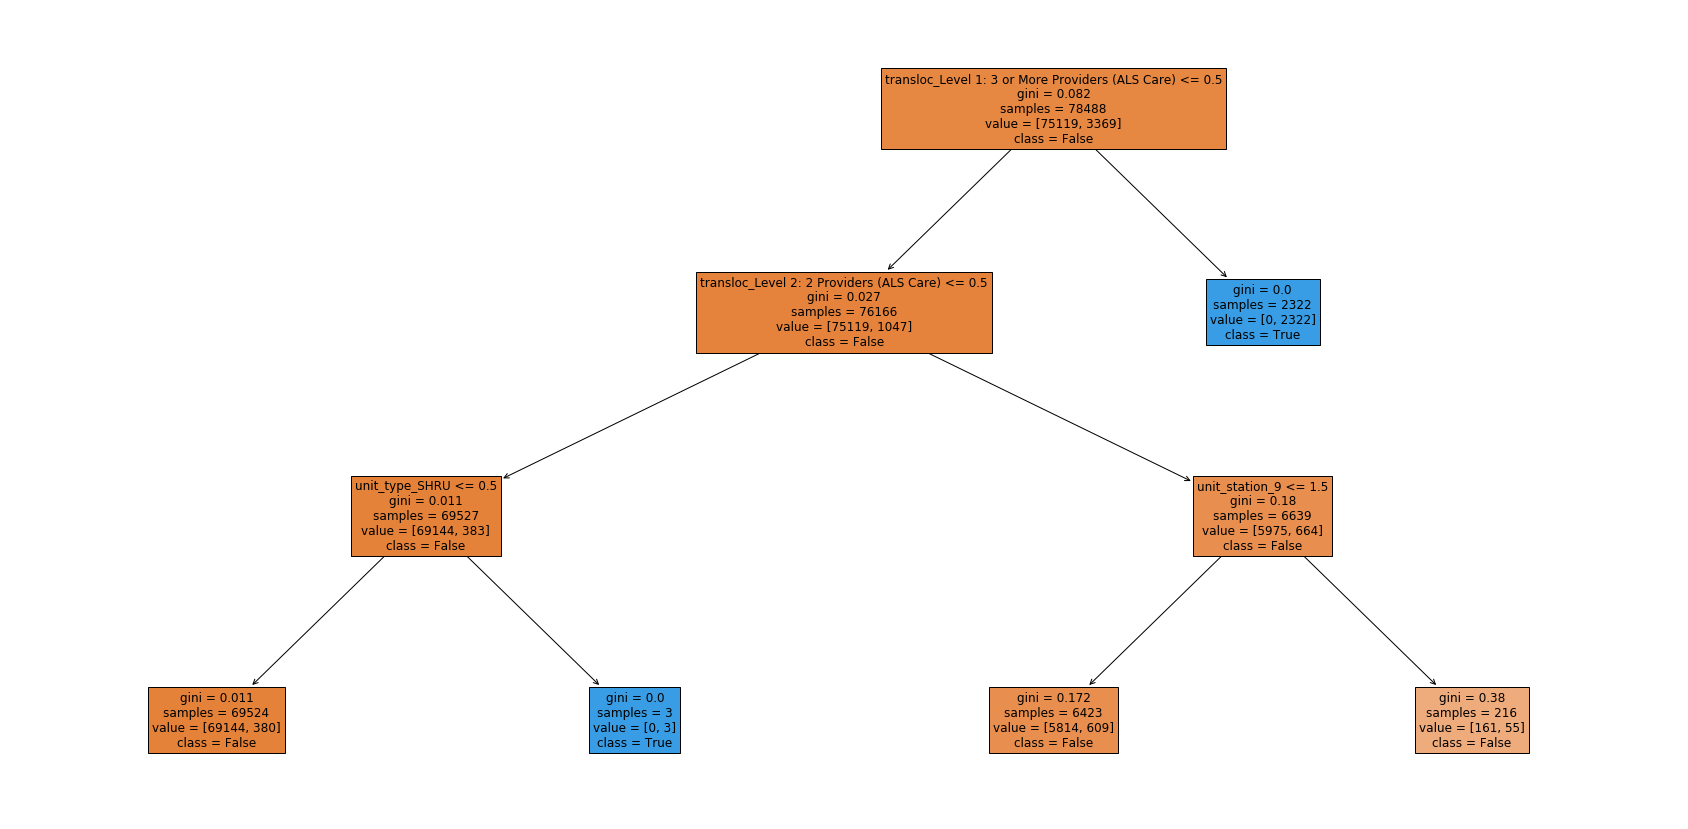

In [75]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 15))
tree.plot_tree(model,feature_names=name,class_names=['False','True'], fontsize=12,filled=True)
plt.show()

In [46]:
final_sp2.is_SecondProvider.value_counts()

False    107290
True       4836
Name: is_SecondProvider, dtype: int64

# Remove unnessary columns

In [78]:
final_sp3=final_sp2.drop(columns=['transloc_Level 1: 3 or More Providers (ALS Care)',
                                  'transloc_Level 2: 2 Providers (ALS Care)',
                                 'transloc_Level 3: 1 Provider (ALS Care)',
                                  'transloc_Level 4: 1 Provider (BLS Care)',
                                 'transloc_No Transport LOC'])
from sklearn.model_selection import train_test_split
x = final_sp3.drop('is_SecondProvider', axis = 1)
y = final_sp3['is_SecondProvider']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=112)
name=list(x.columns)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data,predictions)*100)
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=name)
print(text_representation)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 15))
tree.plot_tree(model,feature_names=name,class_names=['False','True'], fontsize=12,filled=True)
plt.show()

              precision    recall  f1-score   support

       False       0.96      1.00      0.98     32171
        True       0.69      0.19      0.29      1467

    accuracy                           0.96     33638
   macro avg       0.83      0.59      0.64     33638
weighted avg       0.95      0.96      0.95     33638

[[32049   122]
 [ 1195   272]]
96.08478506451038
|--- procedure_IO Start - Intraosseous Access <= 0.50
|   |--- procedure_Resp - Assist Ventilation - BVM Via Mask <= 0.50
|   |   |--- reason_Specialty Center (Trauma STEMI Stroke) <= 0.50
|   |   |   |--- class: False
|   |   |--- reason_Specialty Center (Trauma STEMI Stroke) >  0.50
|   |   |   |--- class: False
|   |--- procedure_Resp - Assist Ventilation - BVM Via Mask >  0.50
|   |   |--- medication_Naloxone (Narcan) <= 0.50
|   |   |   |--- class: True
|   |   |--- medication_Naloxone (Narcan) >  0.50
|   |   |   |--- class: False
|--- procedure_IO Start - Intraosseous Access >  0.50
|   |--- medication_Lidocai

              precision    recall  f1-score   support

       False       0.96      1.00      0.98     32171
        True       0.71      0.16      0.26      1467

    accuracy                           0.96     33638
   macro avg       0.83      0.58      0.62     33638
weighted avg       0.95      0.96      0.95     33638

[[32075    96]
 [ 1236   231]]
96.04019263927701
|--- procedure_IO Start - Intraosseous Access <= 0.50
|   |--- class: False
|--- procedure_IO Start - Intraosseous Access >  0.50
|   |--- class: True



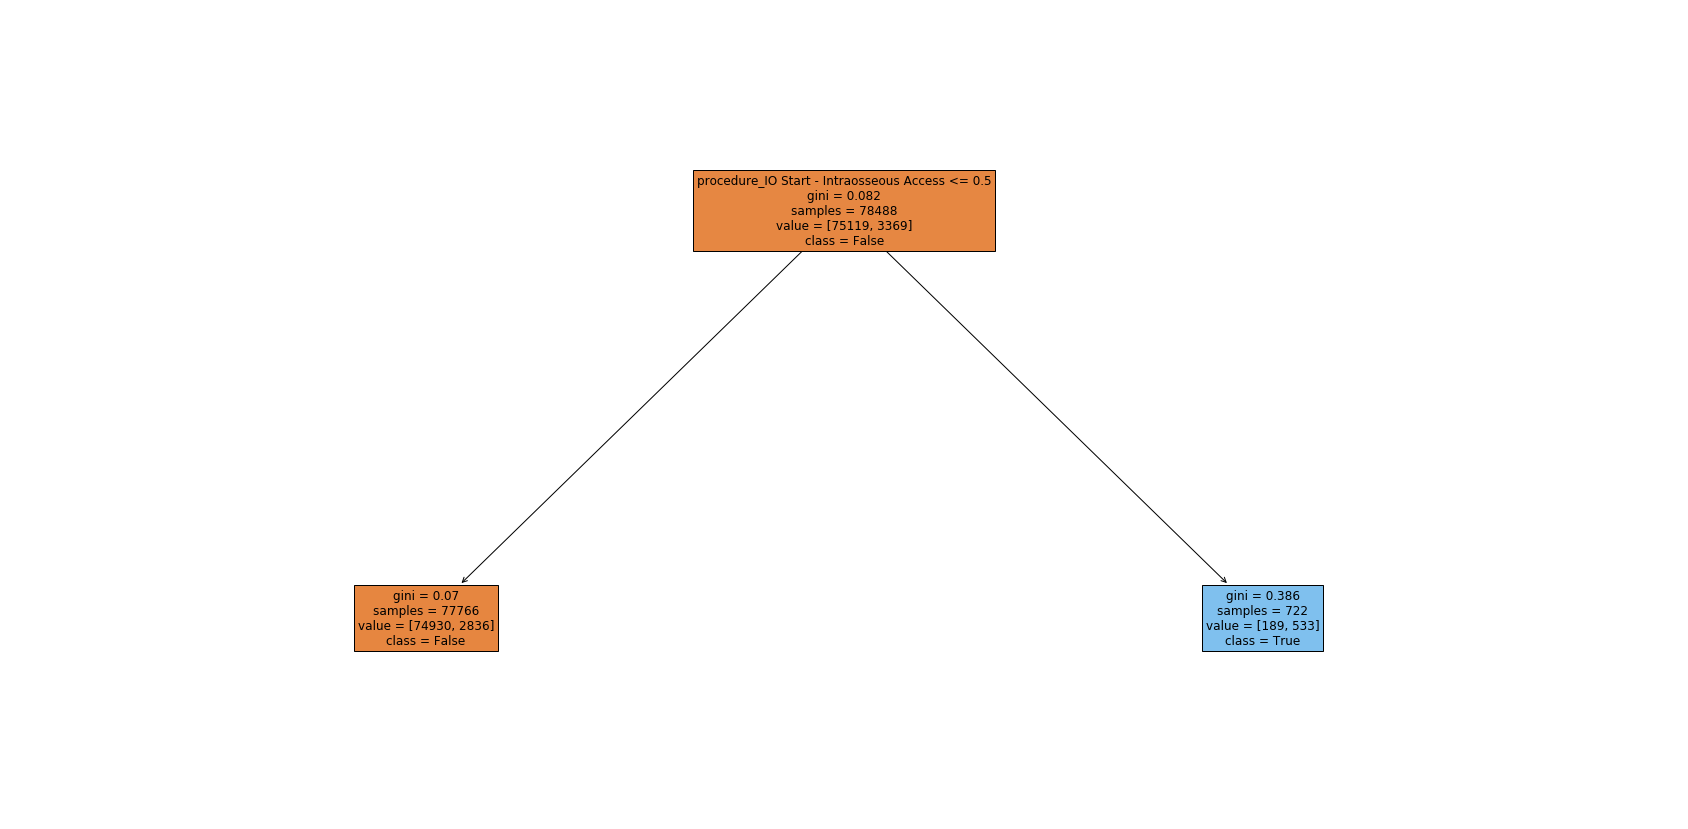

In [77]:
final_sp3=final_sp2.drop(columns=['transloc_Level 1: 3 or More Providers (ALS Care)',
                                  'transloc_Level 2: 2 Providers (ALS Care)',
                                 'transloc_Level 3: 1 Provider (ALS Care)',
                                  'transloc_Level 4: 1 Provider (BLS Care)',
                                 'transloc_No Transport LOC'])
from sklearn.model_selection import train_test_split
x = final_sp3.drop('is_SecondProvider', axis = 1)
y = final_sp3['is_SecondProvider']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3,random_state=112)
name=list(x.columns)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=1)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data,predictions)*100)
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=name)
print(text_representation)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30, 15))
tree.plot_tree(model,feature_names=name,class_names=['False','True'], fontsize=12,filled=True)
plt.show()

# New decision Tree

In [49]:
new_sp = pd.read_csv('/Users/phuriwatnitikunchainun/Desktop/DAEN/new table/MasterData_Restructured3.txt',sep="|",dtype='unicode')

In [50]:
new=new_sp.merge(number1,on='PrimaryKey')
newfinal_sp=new[new['Count # of PatientID']==1]
newfinal_sp

Unnamed: 0   PrimaryKey IncidentFirstDue CallDTMonth CallDTHour  \
0            8662  10004310006            431.0           9          9   
1            8663  10004170002            417.0           9          9   
2            8664  10004220071            422.0           9          9   
3            8665  10004240080            424.0           9          9   
4            8666  10004100081            410.0           9          9   
...           ...          ...              ...         ...        ...   
113979     122644  12354409006            440.0          12         23   
113980     122645     12359015  Outside Fairfax          12         23   
113981     122646  12354219030            421.0          12         23   
113982     122647  12354449085            444.0          12         23   
113983     122648  12354229090            422.0          12         23   

       InitialIncidentType_ACCIBF InitialIncidentType_ACCIF  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
113979                          0                         0   
113980                          0                         0   
113981                          0                         0   
113982                          0                         0   
113983                          0                         0   

       InitialIncidentType_ACCIHF InitialIncidentType_ACCIMF  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
113979                          0                          0   
113980                          0                          0   
113981                          0                          0   
113982                          0                          0   
113983                          0                          0   

       InitialIncidentType_ACCITF InitialIncidentType_ACOD  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
113979                          0                        0   
113980                          0                        0   
113981                          0                        0   
113982                          0                        0   
113983                          0                        0   

       InitialIncidentType_ALRMFD InitialIncidentType_ALS  \
0                               0                       0   
1                               0                       0   
2                               0                       1   
3                               0                       1   
4                               0                       1   
...                           ...                     ...   
113979                          0                       1   
113980                          0                       0   
113981                          0                       1   
113982                          0                       0   
113983                          0                       1   

       InitialIncidentType_AMED InitialIncidentType_ASLTWF  \
0                             0                     

In [51]:
aa = pd.read_csv('/Users/phuriwatnitikunchainun/secondprovider.csv',dtype='unicode')
aa=aa[['PrimaryKey','is_SecondProvider']]
aa

PrimaryKey is_SecondProvider
0     10354168171              True
1     10474178665              True
2     10674059979              True
3     12244185257              True
4     12334085499              True
...           ...               ...
6625  12324391817              True
6626  10604159923              True
6627  11144223776              True
6628  11734278291              True
6629  11304228938              True

[6630 rows x 2 columns]

In [52]:
newfinal_sp=newfinal_sp.merge(aa,how='left',on='PrimaryKey')
newfinal_sp['is_SecondProvider'] = newfinal_sp['is_SecondProvider'].fillna(False)

In [53]:
newfinal_sp.head(6)

Unnamed: 0   PrimaryKey IncidentFirstDue CallDTMonth CallDTHour  \
0       8662  10004310006            431.0           9          9   
1       8663  10004170002            417.0           9          9   
2       8664  10004220071            422.0           9          9   
3       8665  10004240080            424.0           9          9   
4       8666  10004100081            410.0           9          9   
5       8667  10004250084            425.0           9          9   

  InitialIncidentType_ACCIBF InitialIncidentType_ACCIF  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   

  InitialIncidentType_ACCIHF InitialIncidentType_ACCIMF  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   
5                          0                          0   

  InitialIncidentType_ACCITF InitialIncidentType_ACOD  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
5                          0                        0   

  InitialIncidentType_ALRMFD InitialIncidentType_ALS InitialIncidentType_AMED  \
0                          0                       0                        0   
1                          0                       0                        0   
2                          0                       1                        0   
3                          0                       1                        0   
4                          0                       1                        0   
5                          0                       1                        0   

  InitialIncidentType_ASLTWF InitialIncidentType_BLAST  \
0                          0                         0   
1                          0                         0   
2                          0                         0   
3                          0                         0   
4                          0                         0   
5                          0                         0   

  InitialIncidentType_BLS InitialIncidentType_CAVEIN  \
0                       1                          0   
1                       1                          0   
2                       0                          0   
3                       0                          0   
4                       0                          0   
5                       0                          0   

  InitialIncidentType_CODE1 InitialIncidentType_CPRF  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
5                         0                        0   

  InitialIncidentType_DROWNF InitialIncidentType_ECOD  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
5                          0                        0   

  InitialIncidentType_ELEV InitialIncidentType_EMETROF  \
0                        0                           0   
1                   

In [54]:
new_list=[]
for i in newfinal_sp['is_SecondProvider']:
    if i =='True':
        new_list.append(1.0)
    if i ==False:
        new_list.append(0.0)

In [55]:
new_list
newfinal_sp['is_SecondProvider2']=new_list
newfinal_sp

Unnamed: 0   PrimaryKey IncidentFirstDue CallDTMonth CallDTHour  \
0            8662  10004310006            431.0           9          9   
1            8663  10004170002            417.0           9          9   
2            8664  10004220071            422.0           9          9   
3            8665  10004240080            424.0           9          9   
4            8666  10004100081            410.0           9          9   
...           ...          ...              ...         ...        ...   
112121     122644  12354409006            440.0          12         23   
112122     122645     12359015  Outside Fairfax          12         23   
112123     122646  12354219030            421.0          12         23   
112124     122647  12354449085            444.0          12         23   
112125     122648  12354229090            422.0          12         23   

       InitialIncidentType_ACCIBF InitialIncidentType_ACCIF  \
0                               0                         0   
1                               0                         0   
2                               0                         0   
3                               0                         0   
4                               0                         0   
...                           ...                       ...   
112121                          0                         0   
112122                          0                         0   
112123                          0                         0   
112124                          0                         0   
112125                          0                         0   

       InitialIncidentType_ACCIHF InitialIncidentType_ACCIMF  \
0                               0                          0   
1                               0                          0   
2                               0                          0   
3                               0                          0   
4                               0                          0   
...                           ...                        ...   
112121                          0                          0   
112122                          0                          0   
112123                          0                          0   
112124                          0                          0   
112125                          0                          0   

       InitialIncidentType_ACCITF InitialIncidentType_ACOD  \
0                               0                        0   
1                               0                        0   
2                               0                        0   
3                               0                        0   
4                               0                        0   
...                           ...                      ...   
112121                          0                        0   
112122                          0                        0   
112123                          0                        0   
112124                          0                        0   
112125                          0                        0   

       InitialIncidentType_ALRMFD InitialIncidentType_ALS  \
0                               0                       0   
1                               0                       0   
2                               0                       1   
3                               0                       1   
4                               0                       1   
...                           ...                     ...   
112121                          0                       1   
112122                          0                       0   
112123                          0                       1   
112124                          0                       0   
112125                          0                       1   

       InitialIncidentType_AMED InitialIncidentType_ASLTWF  \
0                             0                     

In [56]:
#newfinal_sp["is_SecondProvider"] = newfinal_sp["is_SecondProvider"].astype(int)

In [57]:
name=list(newfinal_sp.columns)

In [58]:
name = [e for e in name if e not in ('Unnamed: 0','transloc_Level 1: 3 or More Providers (ALS Care)', 'transloc_Level 2: 2 Providers (ALS Care)',
                                    'transloc_Level 3: 1 Provider (ALS Care)',
                                    'transloc_Level 4: 1 Provider (BLS Care)',
                                    'transloc_No Transport LOC',
                                    'Count # of PatientID',
                                    'IncidentFirstDue',
                                    'is_SecondProvider',
                                    'is_SecondProvider2')]

In [59]:
name

['PrimaryKey',
 'CallDTMonth',
 'CallDTHour',
 'InitialIncidentType_ACCIBF',
 'InitialIncidentType_ACCIF',
 'InitialIncidentType_ACCIHF',
 'InitialIncidentType_ACCIMF',
 'InitialIncidentType_ACCITF',
 'InitialIncidentType_ACOD',
 'InitialIncidentType_ALRMFD',
 'InitialIncidentType_ALS',
 'InitialIncidentType_AMED',
 'InitialIncidentType_ASLTWF',
 'InitialIncidentType_BLAST',
 'InitialIncidentType_BLS',
 'InitialIncidentType_CAVEIN',
 'InitialIncidentType_CODE1',
 'InitialIncidentType_CPRF',
 'InitialIncidentType_DROWNF',
 'InitialIncidentType_ECOD',
 'InitialIncidentType_ELEV',
 'InitialIncidentType_EMETROF',
 'InitialIncidentType_FACCIF',
 'InitialIncidentType_FBLDG',
 'InitialIncidentType_FDACCF',
 'InitialIncidentType_FDACCIF',
 'InitialIncidentType_FDACCIMF',
 'InitialIncidentType_FDACCITF',
 'InitialIncidentType_FGAPT',
 'InitialIncidentType_FHIRIS',
 'InitialIncidentType_FHOU',
 'InitialIncidentType_FOUT',
 'InitialIncidentType_FTH',
 'InitialIncidentType_FTRKF',
 'InitialInciden

In [60]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=112)
x = newfinal_sp[name]
y = newfinal_sp['is_SecondProvider2']
dt.get_params()
params_dt = {'max_depth':[2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf':[0.12, 0.14, 0.16, 0.18, 0.2, 0.25]}
from sklearn.model_selection import GridSearchCV
grid_dt = GridSearchCV(estimator=dt, param_grid = params_dt, scoring='roc_auc', cv=5, n_jobs=-1)
grid_dt.fit(x, y)
best_model = grid_dt.best_estimator_

In [61]:
best_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')

In [62]:
name=list(newfinal_sp.columns)
name = [e for e in name if e not in ('Unnamed: 0','transloc_Level 1: 3 or More Providers (ALS Care)', 'transloc_Level 2: 2 Providers (ALS Care)',
                                    'transloc_Level 3: 1 Provider (ALS Care)',
                                    'transloc_Level 4: 1 Provider (BLS Care)',
                                    'transloc_No Transport LOC',
                                    'Count # of PatientID',
                                    'IncidentFirstDue',
                                    'is_SecondProvider2',
                                    'is_SecondProvider')]

In [63]:
name

['PrimaryKey',
 'CallDTMonth',
 'CallDTHour',
 'InitialIncidentType_ACCIBF',
 'InitialIncidentType_ACCIF',
 'InitialIncidentType_ACCIHF',
 'InitialIncidentType_ACCIMF',
 'InitialIncidentType_ACCITF',
 'InitialIncidentType_ACOD',
 'InitialIncidentType_ALRMFD',
 'InitialIncidentType_ALS',
 'InitialIncidentType_AMED',
 'InitialIncidentType_ASLTWF',
 'InitialIncidentType_BLAST',
 'InitialIncidentType_BLS',
 'InitialIncidentType_CAVEIN',
 'InitialIncidentType_CODE1',
 'InitialIncidentType_CPRF',
 'InitialIncidentType_DROWNF',
 'InitialIncidentType_ECOD',
 'InitialIncidentType_ELEV',
 'InitialIncidentType_EMETROF',
 'InitialIncidentType_FACCIF',
 'InitialIncidentType_FBLDG',
 'InitialIncidentType_FDACCF',
 'InitialIncidentType_FDACCIF',
 'InitialIncidentType_FDACCIMF',
 'InitialIncidentType_FDACCITF',
 'InitialIncidentType_FGAPT',
 'InitialIncidentType_FHIRIS',
 'InitialIncidentType_FHOU',
 'InitialIncidentType_FOUT',
 'InitialIncidentType_FTH',
 'InitialIncidentType_FTRKF',
 'InitialInciden

In [64]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.12, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')

In [65]:
from sklearn.model_selection import train_test_split
x = newfinal_sp[name]
y = newfinal_sp['is_SecondProvider2']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=112, splitter='best')
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test_data, predictions))
print(confusion_matrix(y_test_data, predictions))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_data,predictions)*100)
from sklearn import tree
from sklearn.tree import export_text
text_representation=tree.export_text(model,feature_names=name)
print(text_representation)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 25))
tree.plot_tree(model,feature_names=name,class_names=['False','True'],fontsize=12,filled=True)
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     32216
         1.0       0.71      0.18      0.28      1422

    accuracy                           0.96     33638
   macro avg       0.84      0.59      0.63     33638
weighted avg       0.95      0.96      0.95     33638

[[32115   101]
 [ 1171   251]]
96.21856234021048
|--- procedure_IO Start - Intraosseous Access <= 0.50
|   |--- reason_Specialty Center (Trauma STEMI Stroke) <= 0.50
|   |   |--- isALS_LOC <= 0.50
|   |   |   |--- unit_action_Provide advanced life support (ALS) <= 1.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- unit_action_Provide advanced life support (ALS) >  1.50
|   |   |   |   |--- class: 0.0
|   |   |--- isALS_LOC >  0.50
|   |   |   |--- procedure_Resp - Assist Ventilation - BVM Via Mask <= 0.50
|   |   |   |   |--- class: 0.0
|   |   |   |--- procedure_Resp - Assist Ventilation - BVM Via Mask >  0.50
|   |   |   |   |--- class: 1.0
|   |--- reason_Spe

In [66]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(60, 25))
tree.plot_tree(model,feature_names=name,class_names=['False','True'],fontsize=25,filled=True)
plt.show()